In [43]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
# import StringIO
import math
from keras import optimizers, metrics
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

In [44]:
# %run ../../../prepare_data.py

import sys
sys.path.insert(0, '../../../')
from prepare_data import *

In [45]:
# X_train, X_other_features_train, y_train, X_validate, X_other_features_validate, y_validate = generate_full_matrix_inputs()
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', X_train, y_train, other_features = X_other_features_train)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', X_validate, y_validate,  other_features = X_other_features_validate)
X_train, X_other_features_train, y_train = load_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', other_features=True)
X_validate, X_other_features_validate, y_validate = load_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', other_features=True)

In [24]:
# X_other_features = create_X_features(content)
# print (X_other_features[178200])
decode_position = 30
print (decode_input(X_train[decode_position], dictionary))
# print (X_other_features_train[0])
print (decode_X_features(feature_dictionary, [X_other_features_train[decode_position]]))
# print (len(X_other_features_train[0]))

navleèeta
Vmip3d--n
None


In [55]:
num_examples = len(X_train) # training set size
# nn_input_dim = max_word * len(dictionary) # input layer dimensionality
# nn_output_dim = max_num_vowels * max_num_vowels # output layer dimensionality
nn_output_dim = 11
nn_hdim = 516
batch_size = 16
actual_epoch = 30
num_fake_epoch = 20

# Gradient descent parameters (I picked these by hand)
# epsilon = 1 # learning rate for gradient descent
# reg_lambda = 1 # regularization strength

In [56]:
# word_processor = Sequential()
# word_processor.add(Conv1D(43, (3), input_shape=(23, 43), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(MaxPooling1D(pool_size=2))
# word_processor.add(Flatten())
# word_processor.add(Dense(516, activation='relu', kernel_constraint=maxnorm(3)))

# metadata_processor = Sequential()
# metadata_processor.add(Dense(256, input_dim=167, activation='relu'))

# model = Sequential()
# model.add(Merge([word_processor, metadata_processor], mode='concat'))  # Merge is your sensor fusion buddy
# model.add(Dense(1024, input_dim=(516 + 256), activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(nn_output_dim, activation='sigmoid'))


# -------------------------------------------------------

conv_input_shape=(23, 43)
othr_input = (167, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(43, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(43, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)
# x_conv = Dense(516, activation='relu', kernel_constraint=maxnorm(3))(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')
# x_othr = Dense(256, input_dim=167, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(512, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(256, activation='relu')(othr_input)

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)

# model = Model(inputs=[conv_input, othr_input], output=x)

In [57]:
model = Model(inputs=[conv_input, othr_input], outputs=x)

# epochs = 5
# lrate = 0.1
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Compile model
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [58]:
history = model.fit_generator(generate_fake_epoch(X_train, X_other_features_train, y_train, batch_size), X_train.shape[0]/(batch_size * num_fake_epoch), epochs=actual_epoch*num_fake_epoch, validation_data=([X_validate, X_other_features_validate], y_validate))

# model.fit([X_train, X_other_features_train], y_train, validation_data=([X_validate, X_other_features_validate], y_validate), epochs=1, batch_size=16)

Epoch 1/600
1336/1335 [==============================] - 222s - loss: 0.1835 - actual_accuracy: 0.3190 - val_loss: 0.1513 - val_actual_accuracy: 0.5475
Epoch 2/600
1336/1335 [==============================] - 244s - loss: 0.1431 - actual_accuracy: 0.5160 - val_loss: 0.1311 - val_actual_accuracy: 0.5891
Epoch 3/600
1336/1335 [==============================] - 329s - loss: 0.1197 - actual_accuracy: 0.6383 - val_loss: 0.1133 - val_actual_accuracy: 0.6788
Epoch 4/600
1336/1335 [==============================] - 338s - loss: 0.1062 - actual_accuracy: 0.6973 - val_loss: 0.1032 - val_actual_accuracy: 0.7217
Epoch 5/600
1336/1335 [==============================] - 343s - loss: 0.0976 - actual_accuracy: 0.7311 - val_loss: 0.0962 - val_actual_accuracy: 0.7489
Epoch 6/600
1336/1335 [==============================] - 341s - loss: 0.0928 - actual_accuracy: 0.7501 - val_loss: 0.0922 - val_actual_accuracy: 0.7557
Epoch 7/600
1336/1335 [==============================] - 339s - loss: 0.0877 - actual_ac

1336/1335 [==============================] - 273s - loss: 0.0273 - actual_accuracy: 0.9347 - val_loss: 0.0877 - val_actual_accuracy: 0.8460
Epoch 55/600
1336/1335 [==============================] - 300s - loss: 0.0260 - actual_accuracy: 0.9389 - val_loss: 0.0966 - val_actual_accuracy: 0.8412
Epoch 56/600
1336/1335 [==============================] - 307s - loss: 0.0280 - actual_accuracy: 0.9320 - val_loss: 0.0918 - val_actual_accuracy: 0.8374
Epoch 57/600
1336/1335 [==============================] - 312s - loss: 0.0265 - actual_accuracy: 0.9369 - val_loss: 0.1002 - val_actual_accuracy: 0.8406
Epoch 58/600
1336/1335 [==============================] - 306s - loss: 0.0259 - actual_accuracy: 0.9372 - val_loss: 0.0995 - val_actual_accuracy: 0.8430
Epoch 59/600
1336/1335 [==============================] - 306s - loss: 0.0257 - actual_accuracy: 0.9396 - val_loss: 0.1036 - val_actual_accuracy: 0.8407
Epoch 60/600
1336/1335 [==============================] - 312s - loss: 0.0260 - actual_accuracy

1336/1335 [==============================] - 315s - loss: 0.0159 - actual_accuracy: 0.9635 - val_loss: 0.1213 - val_actual_accuracy: 0.8581
Epoch 108/600
1336/1335 [==============================] - 307s - loss: 0.0152 - actual_accuracy: 0.9641 - val_loss: 0.1180 - val_actual_accuracy: 0.8416
Epoch 109/600
1336/1335 [==============================] - 312s - loss: 0.0149 - actual_accuracy: 0.9644 - val_loss: 0.1233 - val_actual_accuracy: 0.8556
Epoch 110/600
1336/1335 [==============================] - 317s - loss: 0.0151 - actual_accuracy: 0.9656 - val_loss: 0.1204 - val_actual_accuracy: 0.8523
Epoch 111/600
1336/1335 [==============================] - 314s - loss: 0.0148 - actual_accuracy: 0.9674 - val_loss: 0.1303 - val_actual_accuracy: 0.8592
Epoch 112/600
1336/1335 [==============================] - 314s - loss: 0.0151 - actual_accuracy: 0.9664 - val_loss: 0.1108 - val_actual_accuracy: 0.8550
Epoch 113/600
1336/1335 [==============================] - 319s - loss: 0.0146 - actual_ac

1336/1335 [==============================] - 312s - loss: 0.0110 - actual_accuracy: 0.9761 - val_loss: 0.1196 - val_actual_accuracy: 0.8594
Epoch 161/600
1336/1335 [==============================] - 307s - loss: 0.0104 - actual_accuracy: 0.9755 - val_loss: 0.1307 - val_actual_accuracy: 0.8615
Epoch 162/600
1336/1335 [==============================] - 309s - loss: 0.0104 - actual_accuracy: 0.9763 - val_loss: 0.1296 - val_actual_accuracy: 0.8533976 - ETA: 5s - loss: 0.
Epoch 163/600
1336/1335 [==============================] - 313s - loss: 0.0103 - actual_accuracy: 0.9778 - val_loss: 0.1441 - val_actual_accuracy: 0.8588
Epoch 164/600
1336/1335 [==============================] - 318s - loss: 0.0100 - actual_accuracy: 0.9785 - val_loss: 0.1311 - val_actual_accuracy: 0.8602
Epoch 165/600
1336/1335 [==============================] - 321s - loss: 0.0099 - actual_accuracy: 0.9788 - val_loss: 0.1200 - val_actual_accuracy: 0.8557
Epoch 166/600
1336/1335 [==============================] - 311s - 

1336/1335 [==============================] - 281s - loss: 0.0088 - actual_accuracy: 0.9822 - val_loss: 0.1365 - val_actual_accuracy: 0.8607
Epoch 214/600
1336/1335 [==============================] - 301s - loss: 0.0086 - actual_accuracy: 0.9819 - val_loss: 0.1592 - val_actual_accuracy: 0.8551
Epoch 215/600
1336/1335 [==============================] - 299s - loss: 0.0081 - actual_accuracy: 0.9822 - val_loss: 0.1268 - val_actual_accuracy: 0.8588
Epoch 216/600
1336/1335 [==============================] - 294s - loss: 0.0090 - actual_accuracy: 0.9809 - val_loss: 0.1325 - val_actual_accuracy: 0.8632
Epoch 217/600
1336/1335 [==============================] - 299s - loss: 0.0085 - actual_accuracy: 0.9827 - val_loss: 0.1447 - val_actual_accuracy: 0.8551
Epoch 218/600
1336/1335 [==============================] - 302s - loss: 0.0081 - actual_accuracy: 0.9826 - val_loss: 0.1378 - val_actual_accuracy: 0.8661
Epoch 219/600
1336/1335 [==============================] - 304s - loss: 0.0087 - actual_ac

1336/1335 [==============================] - 327s - loss: 0.0081 - actual_accuracy: 0.9832 - val_loss: 0.1368 - val_actual_accuracy: 0.8613
Epoch 267/600
1336/1335 [==============================] - 331s - loss: 0.0075 - actual_accuracy: 0.9846 - val_loss: 0.1360 - val_actual_accuracy: 0.8646
Epoch 268/600
1336/1335 [==============================] - 334s - loss: 0.0077 - actual_accuracy: 0.9847 - val_loss: 0.1273 - val_actual_accuracy: 0.8629
Epoch 269/600
1336/1335 [==============================] - 337s - loss: 0.0072 - actual_accuracy: 0.9852 - val_loss: 0.1494 - val_actual_accuracy: 0.8629
Epoch 270/600
1336/1335 [==============================] - 309s - loss: 0.0083 - actual_accuracy: 0.9832 - val_loss: 0.1353 - val_actual_accuracy: 0.8666
Epoch 271/600
1336/1335 [==============================] - 321s - loss: 0.0071 - actual_accuracy: 0.9841 - val_loss: 0.1412 - val_actual_accuracy: 0.8631
Epoch 272/600
1336/1335 [==============================] - 317s - loss: 0.0077 - actual_ac

1336/1335 [==============================] - 347s - loss: 0.0079 - actual_accuracy: 0.9852 - val_loss: 0.1365 - val_actual_accuracy: 0.8597
Epoch 320/600
1336/1335 [==============================] - 344s - loss: 0.0074 - actual_accuracy: 0.9848 - val_loss: 0.1393 - val_actual_accuracy: 0.8556
Epoch 321/600
1336/1335 [==============================] - 345s - loss: 0.0067 - actual_accuracy: 0.9870 - val_loss: 0.1587 - val_actual_accuracy: 0.8619
Epoch 322/600
1336/1335 [==============================] - 333s - loss: 0.0081 - actual_accuracy: 0.9854 - val_loss: 0.1304 - val_actual_accuracy: 0.8640
Epoch 323/600
1336/1335 [==============================] - 331s - loss: 0.0073 - actual_accuracy: 0.9862 - val_loss: 0.1626 - val_actual_accuracy: 0.8630
Epoch 324/600
1336/1335 [==============================] - 337s - loss: 0.0072 - actual_accuracy: 0.9850 - val_loss: 0.1368 - val_actual_accuracy: 0.8615
Epoch 325/600
1336/1335 [==============================] - 333s - loss: 0.0073 - actual_ac

1336/1335 [==============================] - 356s - loss: 0.0066 - actual_accuracy: 0.9878 - val_loss: 0.1535 - val_actual_accuracy: 0.8620
Epoch 373/600
1336/1335 [==============================] - 359s - loss: 0.0069 - actual_accuracy: 0.9866 - val_loss: 0.1545 - val_actual_accuracy: 0.8671
Epoch 374/600
1336/1335 [==============================] - 354s - loss: 0.0077 - actual_accuracy: 0.9850 - val_loss: 0.1489 - val_actual_accuracy: 0.8661
Epoch 375/600
1336/1335 [==============================] - 361s - loss: 0.0077 - actual_accuracy: 0.9858 - val_loss: 0.1449 - val_actual_accuracy: 0.8620
Epoch 376/600
1336/1335 [==============================] - 375s - loss: 0.0072 - actual_accuracy: 0.9864 - val_loss: 0.1487 - val_actual_accuracy: 0.8611
Epoch 377/600
1336/1335 [==============================] - 358s - loss: 0.0071 - actual_accuracy: 0.9869 - val_loss: 0.1597 - val_actual_accuracy: 0.8655
Epoch 378/600
1336/1335 [==============================] - 369s - loss: 0.0060 - actual_ac

1336/1335 [==============================] - 404s - loss: 0.0068 - actual_accuracy: 0.9862 - val_loss: 0.1570 - val_actual_accuracy: 0.8514
Epoch 426/600
1336/1335 [==============================] - 396s - loss: 0.0074 - actual_accuracy: 0.9849 - val_loss: 0.1424 - val_actual_accuracy: 0.8626
Epoch 427/600
1336/1335 [==============================] - 386s - loss: 0.0065 - actual_accuracy: 0.9875 - val_loss: 0.1466 - val_actual_accuracy: 0.8599
Epoch 428/600
1336/1335 [==============================] - 401s - loss: 0.0075 - actual_accuracy: 0.9868 - val_loss: 0.1564 - val_actual_accuracy: 0.8592
Epoch 429/600
1336/1335 [==============================] - 400s - loss: 0.0070 - actual_accuracy: 0.9866 - val_loss: 0.1665 - val_actual_accuracy: 0.8658
Epoch 430/600
1336/1335 [==============================] - 393s - loss: 0.0073 - actual_accuracy: 0.9862 - val_loss: 0.1554 - val_actual_accuracy: 0.8563
Epoch 431/600
1336/1335 [==============================] - 411s - loss: 0.0072 - actual_ac

1336/1335 [==============================] - 450s - loss: 0.0068 - actual_accuracy: 0.9873 - val_loss: 0.1620 - val_actual_accuracy: 0.8644
Epoch 479/600
1336/1335 [==============================] - 446s - loss: 0.0088 - actual_accuracy: 0.9854 - val_loss: 0.1245 - val_actual_accuracy: 0.8608
Epoch 480/600
1336/1335 [==============================] - 440s - loss: 0.0071 - actual_accuracy: 0.9873 - val_loss: 0.1569 - val_actual_accuracy: 0.8618
Epoch 481/600
1336/1335 [==============================] - 450s - loss: 0.0077 - actual_accuracy: 0.9860 - val_loss: 0.1720 - val_actual_accuracy: 0.8491
Epoch 482/600
1336/1335 [==============================] - 452s - loss: 0.0072 - actual_accuracy: 0.9866 - val_loss: 0.1745 - val_actual_accuracy: 0.8587
Epoch 483/600
1336/1335 [==============================] - 469s - loss: 0.0073 - actual_accuracy: 0.9866 - val_loss: 0.1542 - val_actual_accuracy: 0.8624
Epoch 484/600
1336/1335 [==============================] - 468s - loss: 0.0070 - actual_ac

1336/1335 [==============================] - 472s - loss: 0.0076 - actual_accuracy: 0.9867 - val_loss: 0.1394 - val_actual_accuracy: 0.8643
Epoch 532/600
1336/1335 [==============================] - 463s - loss: 0.0090 - actual_accuracy: 0.9839 - val_loss: 0.1461 - val_actual_accuracy: 0.8641
Epoch 533/600
1336/1335 [==============================] - 468s - loss: 0.0075 - actual_accuracy: 0.9870 - val_loss: 0.1581 - val_actual_accuracy: 0.8647
Epoch 534/600
1336/1335 [==============================] - 471s - loss: 0.0080 - actual_accuracy: 0.9860 - val_loss: 0.1382 - val_actual_accuracy: 0.8652
Epoch 535/600
1336/1335 [==============================] - 474s - loss: 0.0087 - actual_accuracy: 0.9855 - val_loss: 0.1496 - val_actual_accuracy: 0.8673
Epoch 536/600
1336/1335 [==============================] - 474s - loss: 0.0107 - actual_accuracy: 0.9821 - val_loss: 0.1370 - val_actual_accuracy: 0.8636
Epoch 537/600
1336/1335 [==============================] - 486s - loss: 0.0076 - actual_ac

1336/1335 [==============================] - 483s - loss: 0.0087 - actual_accuracy: 0.9841 - val_loss: 0.1716 - val_actual_accuracy: 0.8701
Epoch 585/600
1336/1335 [==============================] - 495s - loss: 0.0078 - actual_accuracy: 0.9857 - val_loss: 0.1473 - val_actual_accuracy: 0.8645
Epoch 586/600
1336/1335 [==============================] - 499s - loss: 0.0078 - actual_accuracy: 0.9861 - val_loss: 0.1581 - val_actual_accuracy: 0.8687
Epoch 587/600
1336/1335 [==============================] - 511s - loss: 0.0071 - actual_accuracy: 0.9856 - val_loss: 0.1879 - val_actual_accuracy: 0.8622
Epoch 588/600
1336/1335 [==============================] - 490s - loss: 0.0106 - actual_accuracy: 0.9824 - val_loss: 0.1297 - val_actual_accuracy: 0.8648
Epoch 589/600
1336/1335 [==============================] - 492s - loss: 0.0087 - actual_accuracy: 0.9844 - val_loss: 0.1511 - val_actual_accuracy: 0.8652
Epoch 590/600
1336/1335 [==============================] - 496s - loss: 0.0083 - actual_ac

In [59]:
name = '30_epoch'
model.save(name + '.h5')
output = open(name + '_history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()

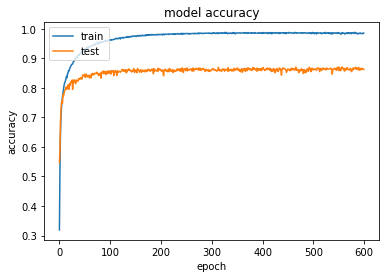

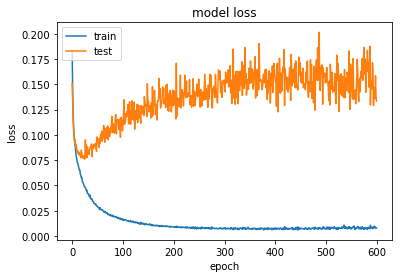

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['actual_accuracy'])
plt.plot(history.history['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = load_model('test.h5')

In [6]:
h5f.close()

NameError: name 'h5f' is not defined

In [67]:
# evaluate the model
scores = model.evaluate([X_validate, X_other_features_validate], y_validate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

108736/108961 [============================>.] - ETA: 0s
acc: 96.57%


In [187]:
pos = 0
print(decode_input(X_validate[pos], dictionary))
# predictions = model.predict([X_validate, X_other_features_validate])
predictions2 = model.predict([X_validate[pos:pos+1], X_other_features_validate[pos:pos+1]])
# print(predictions2)
print(np.round(predictions2)[0])
# predictions = np.round(predictions)
print(y_validate[pos])
# accuracy = sum([1 if np.all(y_validate[i] == predictions[i]) else 0 for i in range(X_validate.shape[0])])/float(X_validate.shape[0])
# print(accuracy)


import keras.backend as K

def act_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.mean(K.equal(K.round(y_true), K.round(y_pred)), axis=-1), 1.0))


def mean_pred2(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
#     return K.mean(K.all(K.equal(y_true, y_pred), axis=-1))
#     return K.equal(K.round(y_true), K.round(y_pred))

print(mean_pred(y_validate[pos], predictions[pos]).eval())
print(mean_pred(np.array([[ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 
                np.array([[ 0.,  0.51,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  0.92,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).eval())
# print(mean_pred(y_validate[pos], predictions[pos]))
# print(mean_pred2(y_validate[pos], predictions[pos]))
print(metrics.categorical_accuracy(y_validate[pos], predictions[pos]))

nerazloènejši
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
1.0
1.0
Elemwise{Cast{float32}}.0


In [ ]:
predictions = model.predict(X[429145:])

In [21]:
decode_position(predictions[0], max_num_vowels)

[1, 0]

In [23]:
def test_accuracy(predictions, y):
    dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
    num_of_pred = len(predictions)
    num_of_correct_pred = 0
    for i in range(predictions.shape[0]):
        if decode_position(predictions[i], max_num_vowels) == decode_position(y[i], max_num_vowels):
            num_of_correct_pred += 1

    return (num_of_correct_pred/float(num_of_pred)) * 100


print(test_accuracy(predictions, y[429145:]))

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
107287
96.5186835311


In [17]:
predictions.shape

(107287, 121)

In [12]:
print max_num_vowels

11


In [31]:
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
feature_dictionary = create_feature_dictionary(content)
def generate_input_from_word(word, max_word, dictionary):
    x = np.zeros((max_word, len(dictionary)))
    j = 0
    for c in list(word):
        index = 0
        for d in dictionary:
            if c == d:
                x[j, index] = 1
                break
            index += 1
        j += 1
    return x

# model = load_model()
# prediction = predict(model, generate_input_from_word('hidrija'))
# print decode_position(prediction[0])

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [190]:
%run ../../../prepare_data.py
# generate_X_and_y(dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels, feature_dictionary)